In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/junhyuk/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/DSL 기초세션/EDA/data.csv")

In [4]:
# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

# Qa, Qd, Qg, Qi, Ql, Qn, Qp, Qt 열 제거
data = data.drop(['QaA', 'QaE', 'QdA', 'QdE', 'QgA', 'QgE', 'QiA', 'QiE', 'QlA', 'QlE', 'QnA', 'QnE',
                  'QpA', 'QpE', 'QtA', 'QtE'], axis=1)

In [21]:
data = data[['QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'age_group', 'tp09', 'tp10']]
age = ['10s', '20s', '30s', '40s', '50s', '60s', '+70s']

- Qq : Most people are basically good and kind
- Qr : One should take action only when sure it is morally right
- Qs : It is wise to flatter important people
- tp09 : Calm, emotionally stable
- tp10 : Conventional, uncreative

- 10,20,30대가 대다수

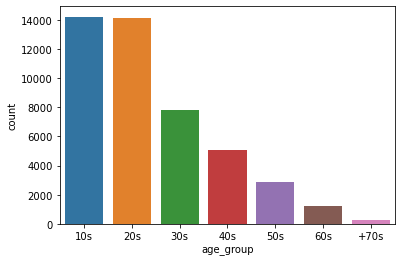

In [24]:
#연령대 별 수
sns.countplot(data = data, x = 'age_group', order=age)
plt.show()

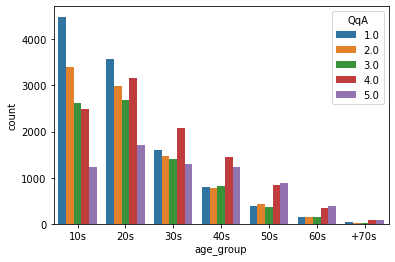

In [22]:
sns.countplot(data = data, x='age_group', hue='QqA', order=age)
plt.show()

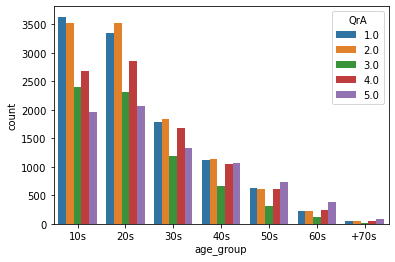

In [23]:
sns.countplot(data=data, x='age_group', hue='QrA', order=age)
plt.show()

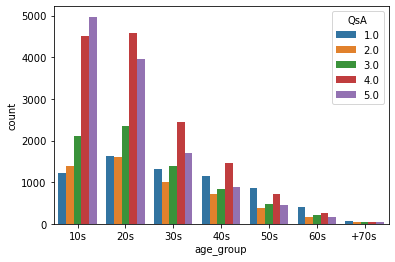

In [25]:
sns.countplot(data=data, x='age_group', hue='QsA', order=age)
plt.show()

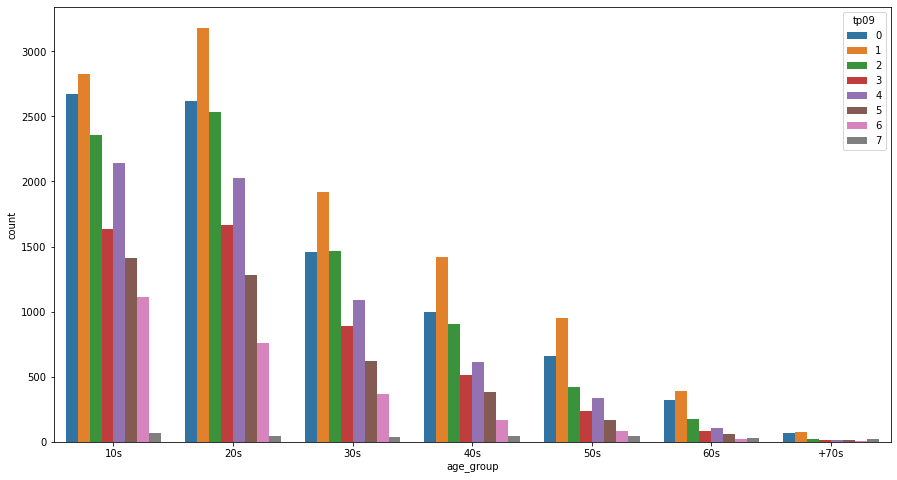

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='age_group', hue='tp09', order=age)
plt.show()

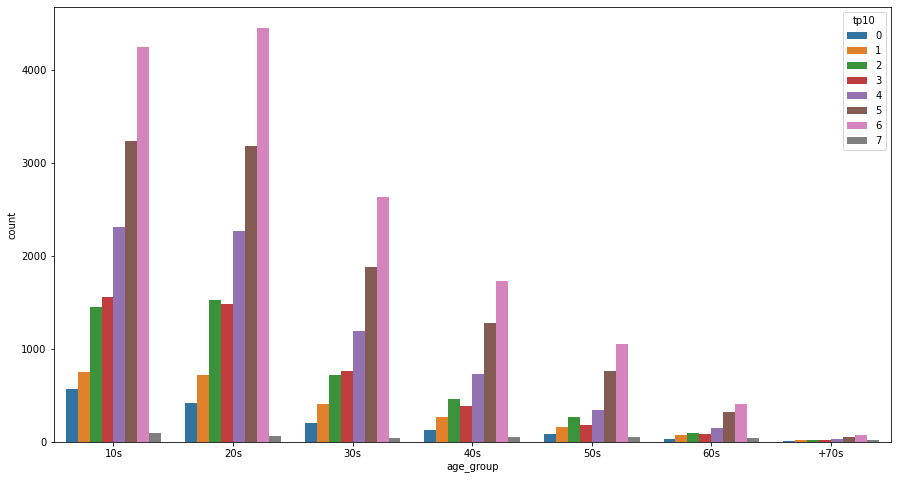

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='age_group', hue='tp10', order=age)
plt.show()

In [158]:
time = pd.pivot_table(data=data, index='age_group', 
                      values=['QqE', 'QrE', 'QsE', 'tp09', 'tp10'], 
                      aggfunc='mean')
time

,QqE,QrE,QsE,tp09,tp10
age_group,,,,,
+70s,1207.940426,1855.770213,1268.395745,1.872340,4.370213
10s,1287.050510,1505.286036,1040.124727,2.475062,4.214421
20s,953.726616,4174.751559,1220.874221,2.312429,4.279408
30s,1408.040965,1924.942062,1244.141399,2.221542,4.383359
40s,973.130271,1746.261136,1152.008711,2.075629,4.453376
50s,1127.766701,1843.566632,1205.588439,1.891312,4.516096
60s,1101.216918,2112.831658,1374.624791,1.747906,4.515913


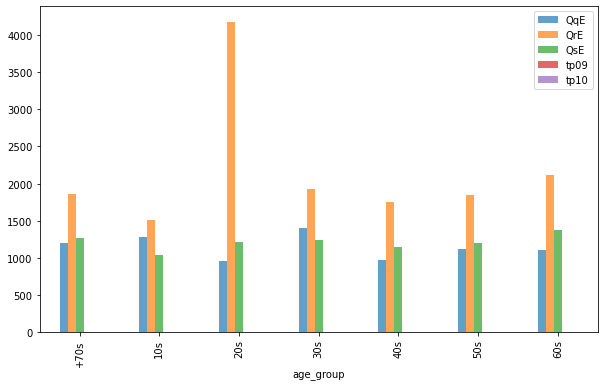

In [161]:
time.plot(kind='bar', figsize=(10,6), stacked=False, alpha =0.7)
plt.show()

In [172]:
data['QrE'].idxmax() #39811
data['QrE'].max() #31593284
data_dropoutlier = data.drop([39811])
data_dropoutlier['QrE'].mean()
#이상치 제거

788999

In [274]:
time_drop = pd.pivot_table(data=data_dropoutlier, index='age_group', 
                      values=['QqE', 'QrE', 'QsE'], 
                      aggfunc='mean')
time_drop

,QqE,QrE,QsE
age_group,,,
+70s,1207.940426,1855.770213,1268.395745
10s,1287.050510,1505.286036,1040.124727
20s,953.723336,1936.135639,1220.867338
30s,1408.040965,1924.942062,1244.141399
40s,973.130271,1746.261136,1152.008711
50s,1127.766701,1843.566632,1205.588439
60s,1101.216918,2112.831658,1374.624791


- 연령에 관계없이 Qr(One should take action only when sure it is morally right)의 평균 응답시간이 제일 긴데 질문이 제일 길어서라고 추정됨
- Qr과 Qs의 경우 연령대가 올라갈수록 응답시간이 길어지는 경향
- 나머지 특이사항 없음

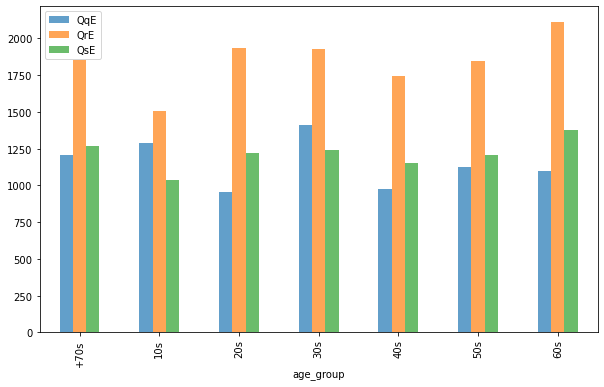

In [275]:
time_drop.plot(kind='bar', figsize=(10,6), stacked=False, alpha =0.7)
plt.show()

In [71]:
ten = data.groupby('age_group').get_group('10s')
twenty = data.groupby('age_group').get_group('20s')
thirty = data.groupby('age_group').get_group('30s')
forty = data.groupby('age_group').get_group('40s')
fifty = data.groupby('age_group').get_group('50s')
sixty = data.groupby('age_group').get_group('60s')
seventy = data.groupby('age_group').get_group('+70s')

# QqA & QqE

## QqA 

### 연령대별 원 그래프

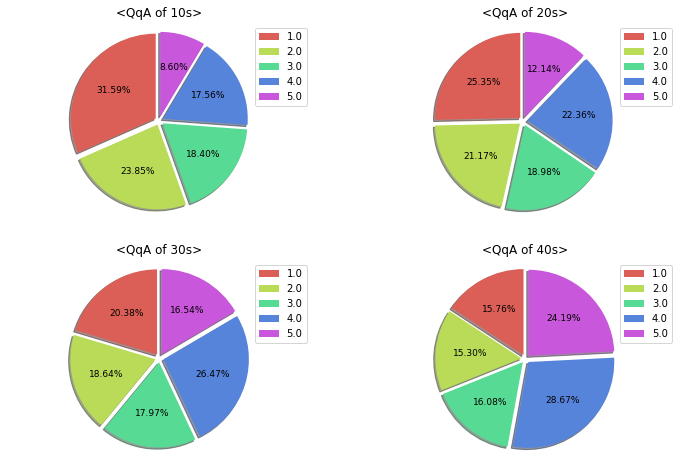

In [261]:
#1,2,3,40대

qq1 = ten['QqA'].value_counts()
qq2 = twenty['QqA'].value_counts()
qq3 = thirty['QqA'].value_counts()
qq4 = forty['QqA'].value_counts()

sizes_qq1 = [qq1[1], qq1[2], qq1[3], qq1[4], qq1[5]]
sizes_qq2 = [qq2[1], qq2[2], qq2[3], qq2[4], qq2[5]]
sizes_qq3 = [qq3[1], qq3[2], qq3[3], qq3[4], qq3[5]]
sizes_qq4 = [qq4[1], qq4[2], qq4[3], qq4[4], qq4[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#10
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qq1,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QqA of 10s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#20
plt.subplot(222)
plt.pie(sizes_qq2,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QqA of 20s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#30
plt.subplot(223)
plt.pie(sizes_qq3,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QqA of 30s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#40
plt.subplot(224)
plt.pie(sizes_qq4,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QqA of 40s>')
plt.legend(pie[0], labels)
plt.axis('equal')


plt.show()

- 연령대가 높아질수록 대부분의 사람들이 기본적으로 친절하고 착하다는 문항에 대해 비동의 하는 비율이 줄어들고 동의하는 비율이 높아짐
- 1이라고 답한 비율에서 10대(31.59%) -> 20대(25.35%) -> 30대(20.38%) -> 40대(15.76%) -> 50대(13.05%) -> 60대(13.15%) -> 70대이상(14.89%)
- 5라고 답한 비율은 10대(8.6%) -> 20대(12.14%) -> 30대(16.54%) -> 40대(24.19%) -> 50대(30.29%) -> 60대(32.33%) -> 70대이상(34.04%)

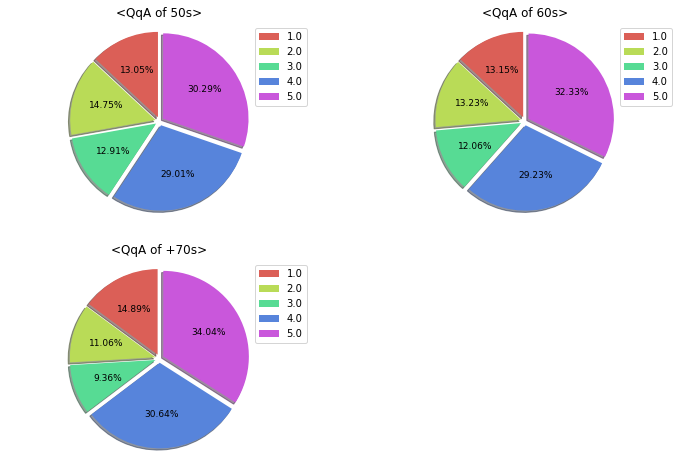

In [262]:
#5,6,70대

qq5 = fifty['QqA'].value_counts()
qq6 = sixty['QqA'].value_counts()
qq7 = seventy['QqA'].value_counts()

sizes_qq5 = [qq5[1], qq5[2], qq5[3], qq5[4], qq5[5]]
sizes_qq6 = [qq6[1], qq6[2], qq6[3], qq6[4], qq6[5]]
sizes_qq7 = [qq7[1], qq7[2], qq7[3], qq7[4], qq7[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#50
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qq5,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QqA of 50s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#60
plt.subplot(222)
plt.pie(sizes_qq6,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QqA of 60s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#70
plt.subplot(223)
plt.pie(sizes_qq7,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QqA of +70s>')
plt.legend(pie[0], labels)
plt.axis('equal')

plt.show()

### 막대 그래프

QqA             1.0       2.0       3.0       4.0       5.0
age_group                                                  
10s        0.315934  0.238480  0.184031  0.175589  0.085966
20s        0.253543  0.211735  0.189768  0.223569  0.121386
30s        0.203803  0.186447  0.179684  0.264676  0.165391
40s        0.157593  0.153039  0.160760  0.286676  0.241932
50s        0.130495  0.147456  0.129110  0.290066  0.302873
60s        0.131491  0.132328  0.120603  0.292295  0.323283
+70s       0.148936  0.110638  0.093617  0.306383  0.340426


Text(0.5, 1.0, 'QqA')

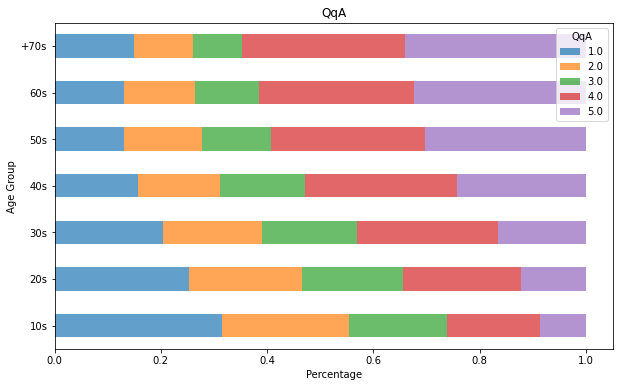

In [263]:
qq_pivot = pd.pivot_table(data = data, index='age_group',
              columns='QqA',
              aggfunc= 'size')

qq_pivot = qq_pivot.div(qq_pivot.sum(axis=1), axis=0)

qq_pivot = qq_pivot.reindex(index=age)
print(qq_pivot)

qq_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QqA')

- 막대그래프로 비율을 나타냈는데 확실히 연령대가 올라갈수록 1,2의 비중이 컸다가 줄어들고 4,5의 비중이 늘어나느 것을 관찰할 수 있음
- 결론 : 연령대가 높을수록 대부분의 사람들이 기본적으로 친절하고 착하다고 생각하는 사람들이 많음

## QqE

### 연령대별 응답시간 평균

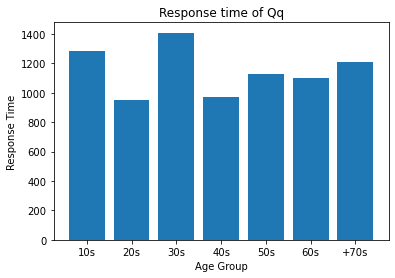

In [224]:
qqtime = data_dropoutlier.groupby(['age_group']).agg({'QqE':'mean'})

qqtime = qqtime.reindex(index=age)

qqtime = qqtime.reset_index()

plt.bar(qqtime['age_group'], qqtime['QqE'])
plt.title("Response time of Qq")
plt.xlabel("Age Group")
plt.ylabel("Response Time")
plt.show()

- 의외로 70대이상보다 30대가 제일 평균 응답시간이 오래 걸리고 10대가 두 번째라는 것을 관찰할 수 있음

# QrA & QrE
## QrA
### 연령대별 원 그래프

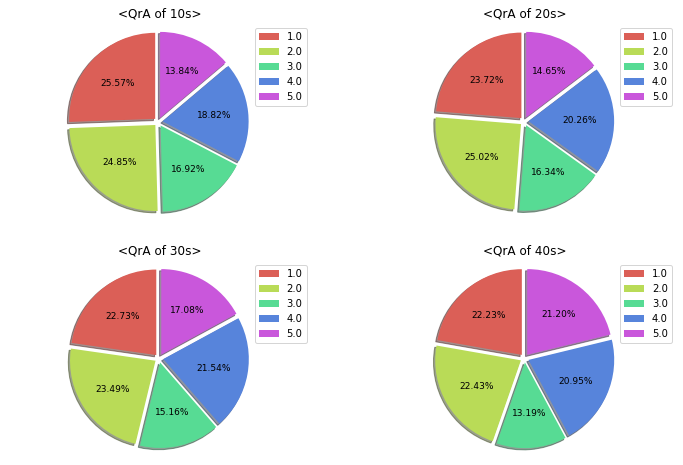

In [265]:
#1,2,3,40대

qr1 = ten['QrA'].value_counts()
qr2 = twenty['QrA'].value_counts()
qr3 = thirty['QrA'].value_counts()
qr4 = forty['QrA'].value_counts()

sizes_qr1 = [qr1[1], qr1[2], qr1[3], qr1[4], qr1[5]]
sizes_qr2 = [qr2[1], qr2[2], qr2[3], qr2[4], qr2[5]]
sizes_qr3 = [qr3[1], qr3[2], qr3[3], qr3[4], qr3[5]]
sizes_qr4 = [qr4[1], qr4[2], qr4[3], qr4[4], qr4[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#10
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qr1,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QrA of 10s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#20
plt.subplot(222)
plt.pie(sizes_qr2,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QrA of 20s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#30
plt.subplot(223)
plt.pie(sizes_qr3,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QrA of 30s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#40
plt.subplot(224)
plt.pie(sizes_qr4,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QrA of 40s>')
plt.legend(pie[0], labels)
plt.axis('equal')


plt.show()

- 윤리적으로 올바를 때만 행동을 취해야 한다는 질문에 대해 이 역시 앞의 질문과 같이 연령대가 높아질수록 동의하는 비율이 늘어나는 것으로 관찰됨
- 1이라고 답한 비율 : 10대(13.84%) -> 20대(14.65%) -> 30대(17.08%) -> 40대(21.20%) -> 50대(25.37%) -> 60대(32.24%) -> 70대이상(33.62%)
- 5라고 답한 비율 : 10대(13.84%) -> 20대(14.65%) -> 30대(17.08%) -> 40대(21.20%) -> 50대(25.37%) -> 60대(32.24%) -> 70대이상(33.62%)

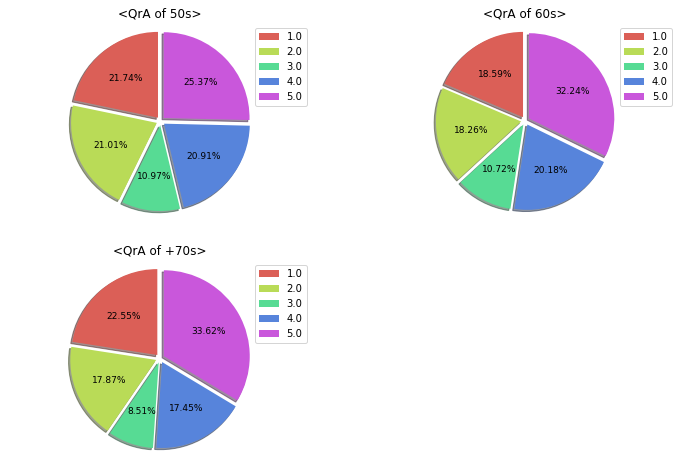

In [266]:
#5,6,70대

qr5 = fifty['QrA'].value_counts()
qr6 = sixty['QrA'].value_counts()
qr7 = seventy['QrA'].value_counts()

sizes_qr5 = [qr5[1], qr5[2], qr5[3], qr5[4], qr5[5]]
sizes_qr6 = [qr6[1], qr6[2], qr6[3], qr6[4], qr6[5]]
sizes_qr7 = [qr7[1], qr7[2], qr7[3], qr7[4], qr7[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#50
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qr5,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QrA of 50s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#60
plt.subplot(222)
plt.pie(sizes_qr6,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QrA of 60s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#70
plt.subplot(223)
plt.pie(sizes_qr7,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QrA of +70s>')
plt.legend(pie[0], labels)
plt.axis('equal')

plt.show()

### 막대 그래프

Text(0.5, 1.0, 'QrA')

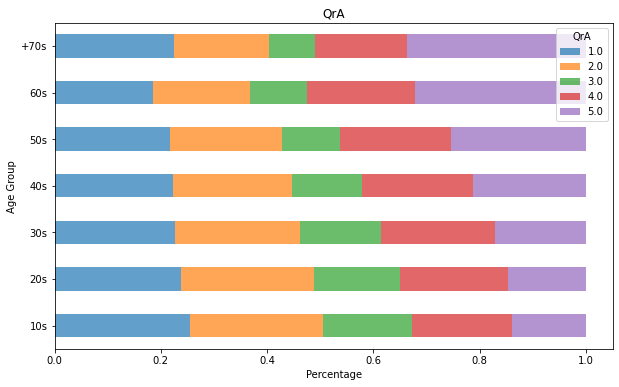

In [236]:
qr_pivot = pd.pivot_table(data = data, index='age_group',
              columns='QrA',
              aggfunc= 'size')

qr_pivot = qr_pivot.div(qr_pivot.sum(axis=1), axis=0)

qr_pivot = qr_pivot.reindex(index=age)

qr_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QrA')

- Qq처럼 연령대가 높아질수록 1,2가 줄어들고 4,5가 늘어남
- 결론 : 연령대가 높아질수록 윤리적인 올바름에 민감함

## QrE

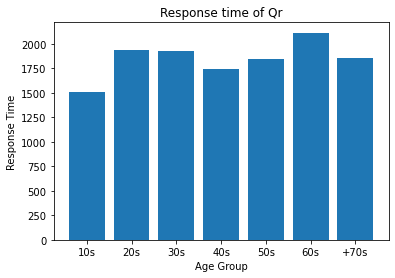

In [225]:
qrtime = data_dropoutlier.groupby(['age_group']).agg({'QrE':'mean'})

qrtime = qrtime.reindex(index=age)

qrtime = qrtime.reset_index()

plt.bar(qrtime['age_group'], qrtime['QrE'])
plt.title("Response time of Qr")
plt.xlabel("Age Group")
plt.ylabel("Response Time")
plt.show()

- 응답시간의 경우 60대 이상에서 제일 오래걸렸고 10대에서 제일 적게 걸림

# QsA & QsE
## QsA
### 원그래프

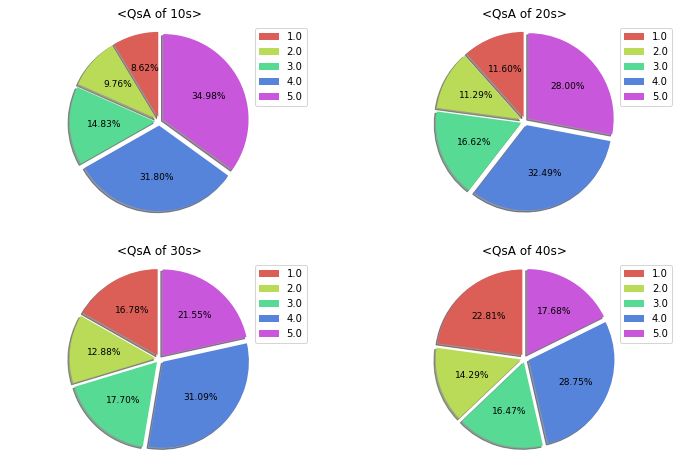

In [267]:
#1,2,3,40대

qs1 = ten['QsA'].value_counts()
qs2 = twenty['QsA'].value_counts()
qs3 = thirty['QsA'].value_counts()
qs4 = forty['QsA'].value_counts()

sizes_qs1 = [qs1[1], qs1[2], qs1[3], qs1[4], qs1[5]]
sizes_qs2 = [qs2[1], qs2[2], qs2[3], qs2[4], qs2[5]]
sizes_qs3 = [qs3[1], qs3[2], qs3[3], qs3[4], qs3[5]]
sizes_qs4 = [qs4[1], qs4[2], qs4[3], qs4[4], qs4[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#10
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qs1,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QsA of 10s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#20
plt.subplot(222)
plt.pie(sizes_qs2,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of 20s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#30
plt.subplot(223)
plt.pie(sizes_qs3,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of 30s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#40
plt.subplot(224)
plt.pie(sizes_qs4,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of 40s>')
plt.legend(pie[0], labels)
plt.axis('equal')


plt.show()

- 위 질문들과 반대로 높은 사람들에게 아첨하는 것은 지혜롭다는 질문에 대해서는 동의하는 비율이 연령대가 낮을수록 높고 연령대가 높아질수록 동의하는 비율이 낮아지고 비동의하는 비율이 높아짐
- 1이라고 답한 비율: 10대(8.62%) -> 20대(11.6%) -> 30대(16.78%) -> 40대(22.81%) -> 50대(29.7%) -> 60대(33.75%) -> 70대이상(30.64%)
- 5라고 답한 비율: 10대(34.98%) -> 20대(28%) -> 30대(21.55%) -> 40대(17.68%) -> 50대(15.61%) -> 60대(13.48%) -> 70대이상(17.02%)

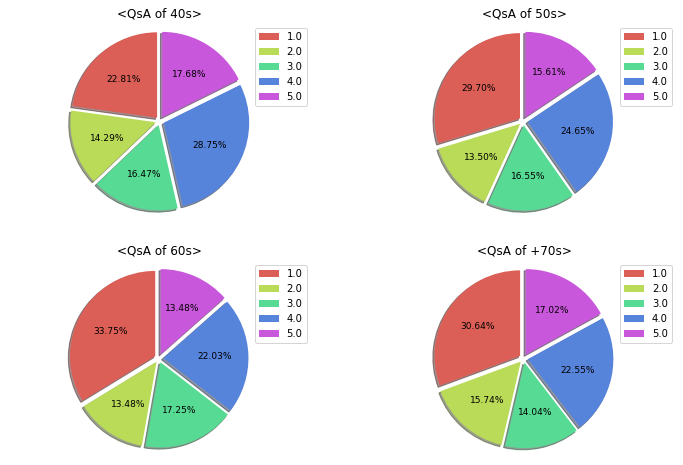

In [233]:
#4,5,6,70대

qs4 = forty['QsA'].value_counts()
qs5 = fifty['QsA'].value_counts()
qs6 = sixty['QsA'].value_counts()
qs7 = seventy['QsA'].value_counts()

sizes_qs4 = [qs4[1], qs4[2], qs4[3], qs4[4], qs4[5]]
sizes_qs5 = [qs5[1], qs5[2], qs5[3], qs5[4], qs5[5]]
sizes_qs6 = [qs6[1], qs6[2], qs6[3], qs6[4], qs6[5]]
sizes_qs7 = [qs7[1], qs7[2], qs7[3], qs7[4], qs7[5]]

labels = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05)

#40
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_qs4,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<QsA of 40s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#50
plt.subplot(222)
plt.pie(sizes_qs5,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of 50s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#60
plt.subplot(223)
plt.pie(sizes_qs6,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of 60s>')
plt.legend(pie[0], labels)
plt.axis('equal')

#70
plt.subplot(224)
plt.pie(sizes_qs7,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<QsA of +70s>')
plt.legend(pie[0], labels)
plt.axis('equal')


plt.show()

### 막대그래프

Text(0.5, 1.0, 'QsA')

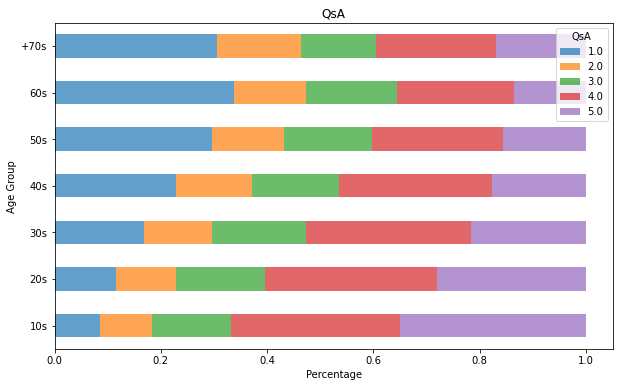

In [235]:
qs_pivot = pd.pivot_table(data = data, index='age_group',
              columns='QsA',
              aggfunc= 'size')

qs_pivot = qs_pivot.div(qs_pivot.sum(axis=1), axis=0)

qs_pivot = qs_pivot.reindex(index=age)

qs_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QsA')

- 연령대가 높아질수록 비동의하는 비율이 높아지고 연령대가 낮을수록 동의하는 비율이 높음
- 결론 : 연령대가 높을수록 아첨하는 것이 옳지 않다 생각한다
- 특이사항: 70대에서는 비율이 60대랑 역전됨

## QsE

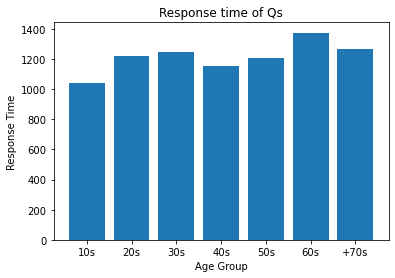

In [237]:
qstime = data_dropoutlier.groupby(['age_group']).agg({'QsE':'mean'})

qstime = qstime.reindex(index=age)

qstime = qstime.reset_index()

plt.bar(qstime['age_group'], qstime['QsE'])
plt.title("Response time of Qs")
plt.xlabel("Age Group")
plt.ylabel("Response Time")
plt.show()

- 60대에서 응답시간이 제일 오래걸렸고 10대에서 제일 적게 걸림

# tp09
## 원그래프

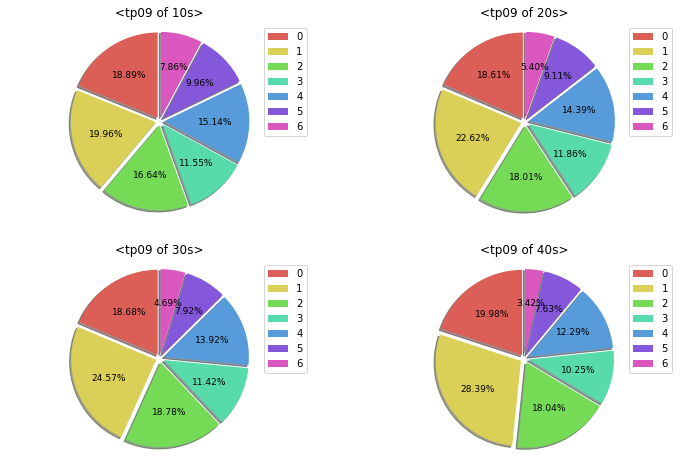

In [268]:
#1,2,3,40대

tp9_1 = ten['tp09'].value_counts()
tp9_2 = twenty['tp09'].value_counts()
tp9_3 = thirty['tp09'].value_counts()
tp9_4 = forty['tp09'].value_counts()

sizes_tp91 = [tp9_1[0], tp9_1[1], tp9_1[2], tp9_1[3], tp9_1[4], tp9_1[5], tp9_1[6]]
sizes_tp92 = [tp9_2[0], tp9_2[1], tp9_2[2], tp9_2[3], tp9_2[4], tp9_2[5], tp9_2[6]]
sizes_tp93 = [tp9_3[0], tp9_3[1], tp9_3[2], tp9_3[3], tp9_3[4], tp9_3[5], tp9_3[6]]
sizes_tp94 = [tp9_4[0], tp9_4[1], tp9_4[2], tp9_4[3], tp9_4[4], tp9_4[5], tp9_4[6]]

labels = ['0', '1', '2', '3', '4', '5', '6']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#10
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_tp91,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<tp09 of 10s>')
plt.legend(labels)
plt.axis('equal')

#20
plt.subplot(222)
plt.pie(sizes_tp92,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp09 of 20s>')
plt.legend(labels)
plt.axis('equal')

#30
plt.subplot(223)
plt.pie(sizes_tp93,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp09 of 30s>')
plt.legend(labels)
plt.axis('equal')

#40
plt.subplot(224)
plt.pie(sizes_tp94,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp09 of 40s>')
plt.legend(labels)
plt.axis('equal')


plt.show()

- 7은 무응답이라 제외. 0에 가까울수록 동의/6에 가까울수록 비동의
- 연령대가 높아질수록 차분하고 0,1,2에 해당하는 비율이 커지는 것을 발견할 수 있음
- 결론 : 연령대가 높을수록 감정적으로 안정적이고 차분하다고 생각하는 사람들이 많다

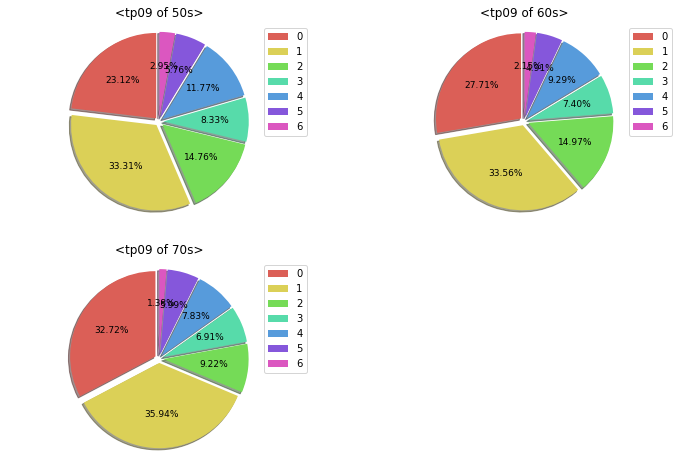

In [271]:
#5,6,70대

tp9_5 = fifty['tp09'].value_counts()
tp9_6 = sixty['tp09'].value_counts()
tp9_7 = seventy['tp09'].value_counts()

sizes_tp95 = [tp9_5[0], tp9_5[1], tp9_5[2], tp9_5[3], tp9_5[4], tp9_5[5], tp9_5[6]]
sizes_tp96 = [tp9_6[0], tp9_6[1], tp9_6[2], tp9_6[3], tp9_6[4], tp9_6[5], tp9_6[6]]
sizes_tp97 = [tp9_7[0], tp9_7[1], tp9_7[2], tp9_7[3], tp9_7[4], tp9_7[5], tp9_7[6]]

labels = ['0', '1', '2', '3', '4', '5', '6']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#50
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_tp95,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<tp09 of 50s>')
plt.legend(labels)
plt.axis('equal')

#60
plt.subplot(222)
plt.pie(sizes_tp96,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp09 of 60s>')
plt.legend(labels)
plt.axis('equal')

#70
plt.subplot(223)
plt.pie(sizes_tp97,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp09 of 70s>')
plt.legend(labels)
plt.axis('equal')

plt.show()

## 막대그래프

Text(0.5, 1.0, 'tp01')

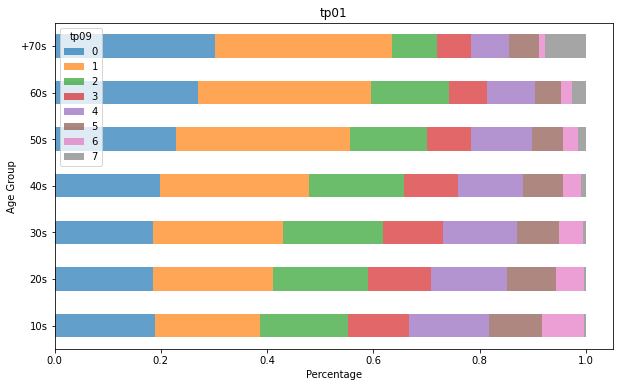

In [252]:
tp09_pivot = pd.pivot_table(data = data, index='age_group',
              columns='tp09',
              aggfunc= 'size')

tp09_pivot = tp09_pivot.div(tp09_pivot.sum(axis=1), axis=0)

tp09_pivot = tp09_pivot.reindex(index=age)

tp09_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('tp01')

# tp10
## 원그래프

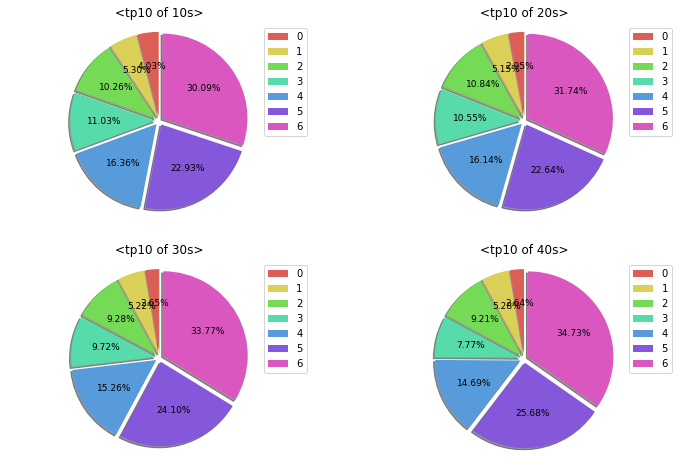

In [272]:
#1,2,3,40대

tp10_1 = ten['tp10'].value_counts()
tp10_2 = twenty['tp10'].value_counts()
tp10_3 = thirty['tp10'].value_counts()
tp10_4 = forty['tp10'].value_counts()

sizes_tp11 = [tp10_1[0], tp10_1[1], tp10_1[2], tp10_1[3], tp10_1[4], tp10_1[5], tp10_1[6]]
sizes_tp12 = [tp10_2[0], tp10_2[1], tp10_2[2], tp10_2[3], tp10_2[4], tp10_2[5], tp10_2[6]]
sizes_tp13 = [tp10_3[0], tp10_3[1], tp10_3[2], tp10_3[3], tp10_3[4], tp10_3[5], tp10_3[6]]
sizes_tp14 = [tp10_4[0], tp10_4[1], tp10_4[2], tp10_4[3], tp10_4[4], tp10_4[5], tp10_4[6]]

labels = ['0', '1', '2', '3', '4', '5', '6']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#10
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_tp11,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<tp10 of 10s>')
plt.legend(labels)
plt.axis('equal')

#20
plt.subplot(222)
plt.pie(sizes_tp12,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp10 of 20s>')
plt.legend(labels)
plt.axis('equal')

#30
plt.subplot(223)
plt.pie(sizes_tp13,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp10 of 30s>')
plt.legend(labels)
plt.axis('equal')

#40
plt.subplot(224)
plt.pie(sizes_tp14,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp10 of 40s>')
plt.legend(labels)
plt.axis('equal')


plt.show()

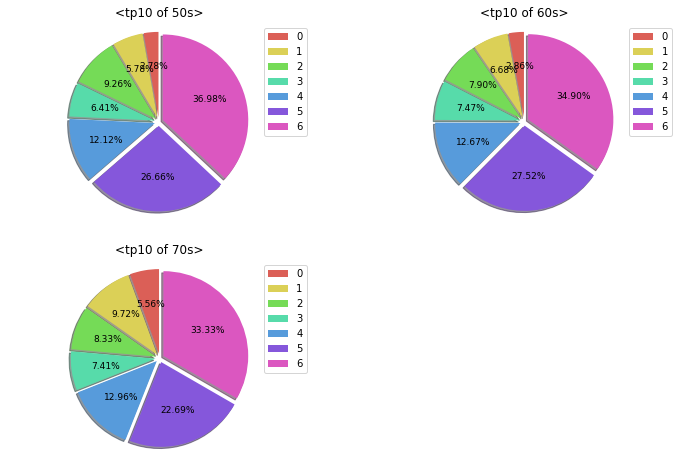

In [273]:
#5,6,70대

tp10_5 = fifty['tp10'].value_counts()
tp10_6 = sixty['tp10'].value_counts()
tp10_7 = seventy['tp10'].value_counts()

sizes_tp15 = [tp10_5[0], tp10_5[1], tp10_5[2], tp10_5[3], tp10_5[4], tp10_5[5], tp10_5[6]]
sizes_tp16 = [tp10_6[0], tp10_6[1], tp10_6[2], tp10_6[3], tp10_6[4], tp10_6[5], tp10_6[6]]
sizes_tp17 = [tp10_7[0], tp10_7[1], tp10_7[2], tp10_7[3], tp10_7[4], tp10_7[5], tp10_7[6]]

labels = ['0', '1', '2', '3', '4', '5', '6']
colors = sns.color_palette('hls', len(labels))
explodes = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#50
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pie(sizes_tp15,
       colors = colors,
       explode = explodes,
       autopct = "%1.2f%%",
       shadow = True,
       startangle = 90,
       textprops = {'fontsize':9})

plt.title('<tp10 of 50s>')
plt.legend(labels)
plt.axis('equal')

#60
plt.subplot(222)
plt.pie(sizes_tp16,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp10 of 60s>')
plt.legend(labels)
plt.axis('equal')

#70
plt.subplot(223)
plt.pie(sizes_tp17,colors = colors,explode = explodes,autopct = "%1.2f%%",shadow = True,
       startangle = 90,textprops = {'fontsize':9})

plt.title('<tp10 of 70s>')
plt.legend(labels)
plt.axis('equal')

plt.show()

- 연령대가 높아질수록 보수적이고, 비창의적이라고 생각하지 않는 비율이 높아짐
- 결론: 연령이 높을수록 보수적인 경향이 있다고 생각이 되는데 이와 반대로 실제 본인들이 생각하기에는 연령대가 높을수록 보수적이고, 비창의적이라고 생각하지 않는 사람들이 많단

## 막대그래프

Text(0.5, 1.0, 'tp10')

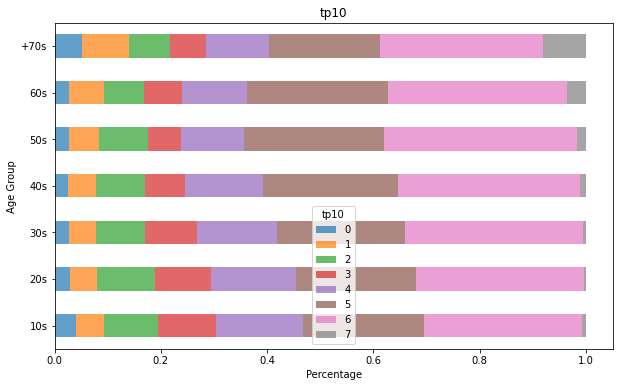

In [259]:
tp10_pivot = pd.pivot_table(data = data, index='age_group',
              columns='tp10',
              aggfunc= 'size')

tp10_pivot = tp10_pivot.div(tp10_pivot.sum(axis=1), axis=0)

tp10_pivot = tp10_pivot.reindex(index=age)

tp10_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('tp10')